Фильмы с данными из википедии
https://www.kaggle.com/jrobischon/wikipedia-movie-plots
1. Подготовьте гистограммы по самым популярным жанрам, режиссерам, нац.
принадлежностям фильмов, годам
2. Подготовьте sentiment analysis по отзывам (используя nltk.classify) и оцените,
как распределяется sentiment по актерам, режиссерам и жанрам

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('wiki_movie_plots_deduped.csv')
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


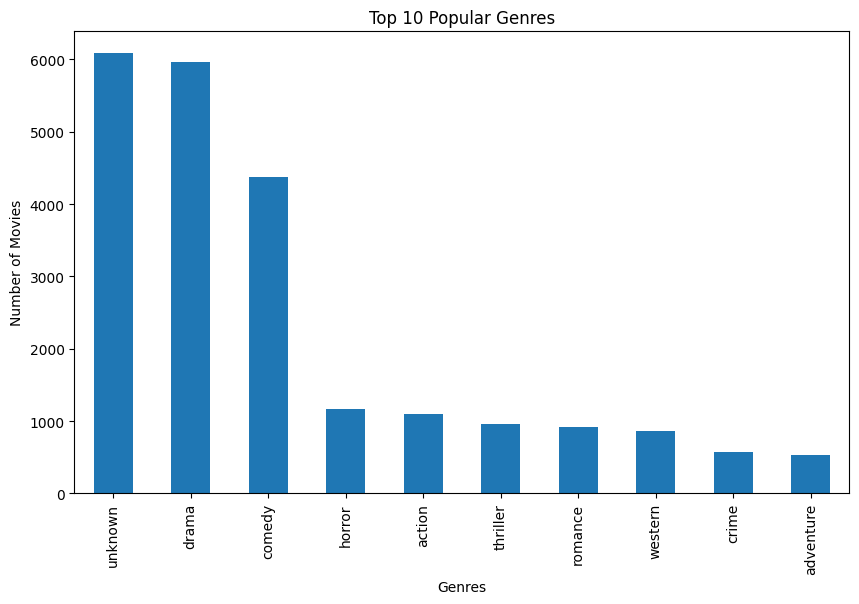

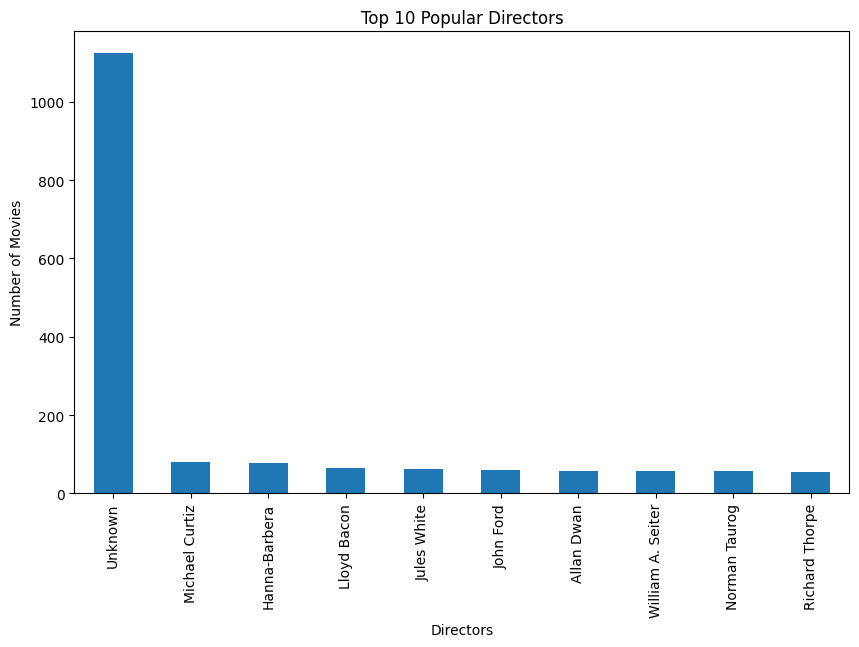

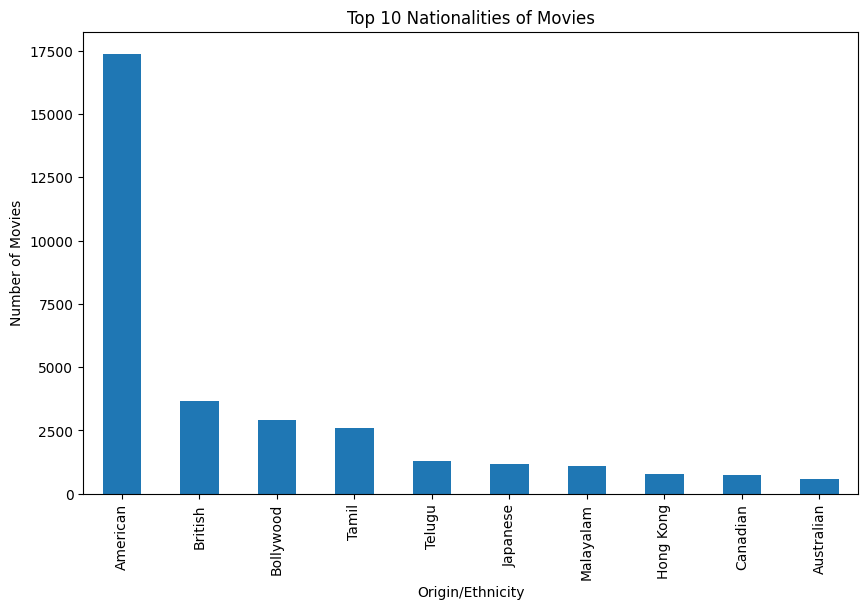

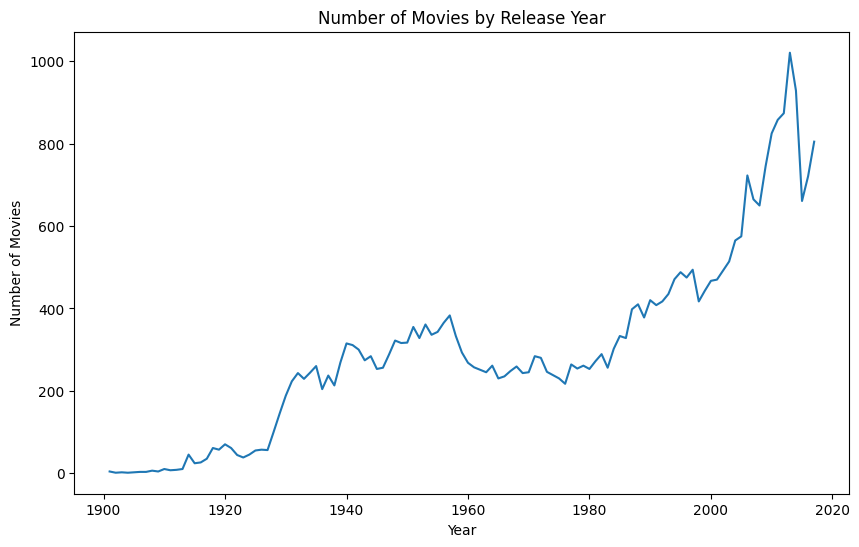

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vtako\AppData\Roaming\nltk_data...


Sentiment by Genre:
Genre
dance, musical, idol                                                0.9999
drama, romance, musical, family                                     0.9995
animation fantasy                                                   0.9995
fantasy, children's, action, comedy, comedy-drama, slice of life    0.9994
biographical comedy-drama                                           0.9994
                                                                     ...  
thriller, suspense                                                 -0.9998
campus, romance                                                    -0.9998
horror, fantasy, action, magical girl, science fantasy, spy        -0.9998
thriller/musical                                                   -0.9998
action / romance / fantasy                                         -0.9998
Name: Sentiment, Length: 2265, dtype: float64

Sentiment by Top 10 Directors:
Director
Hayato Kawai                                   0.9995
James Qu

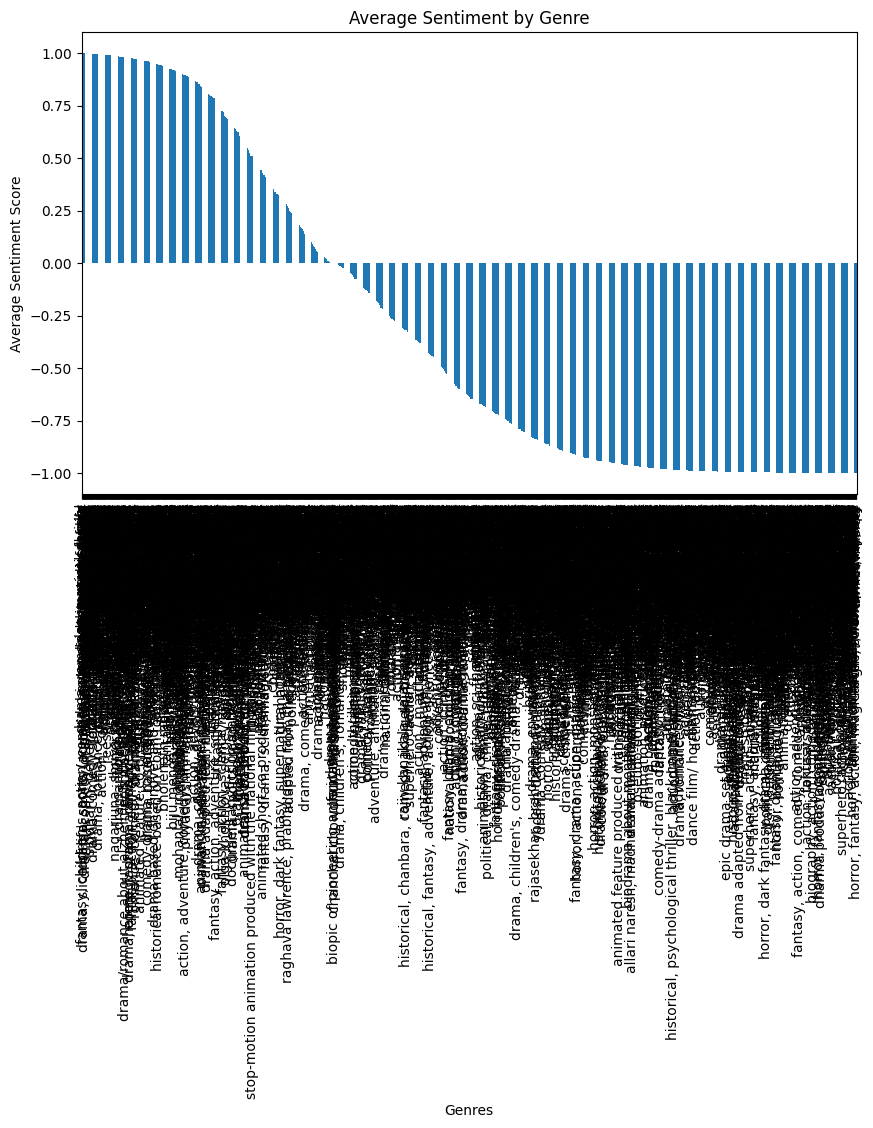

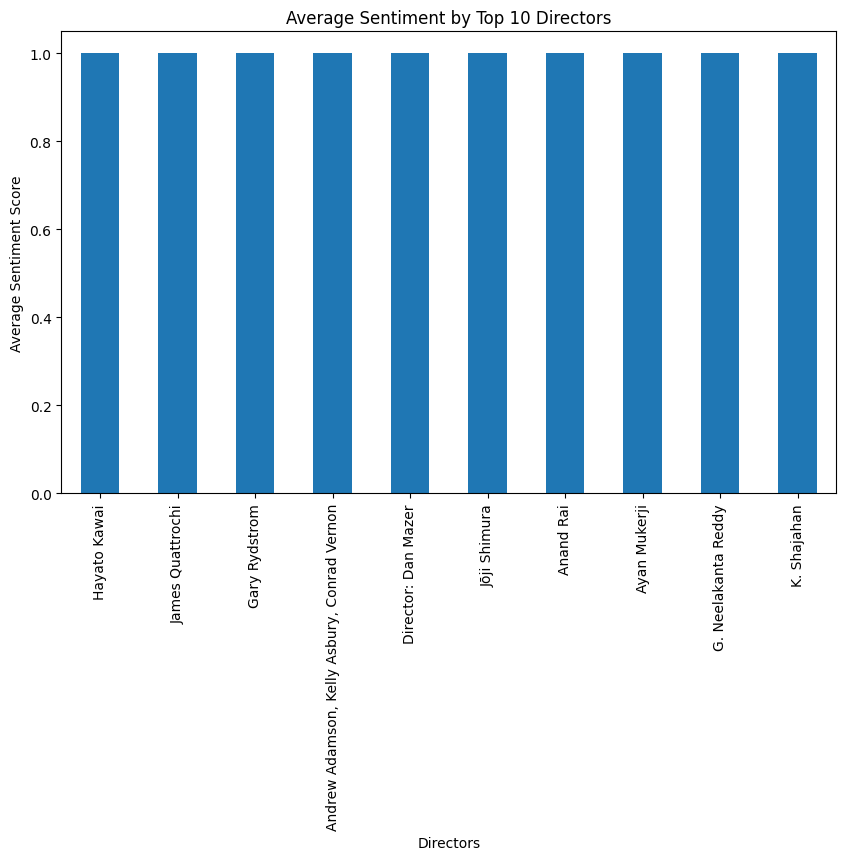

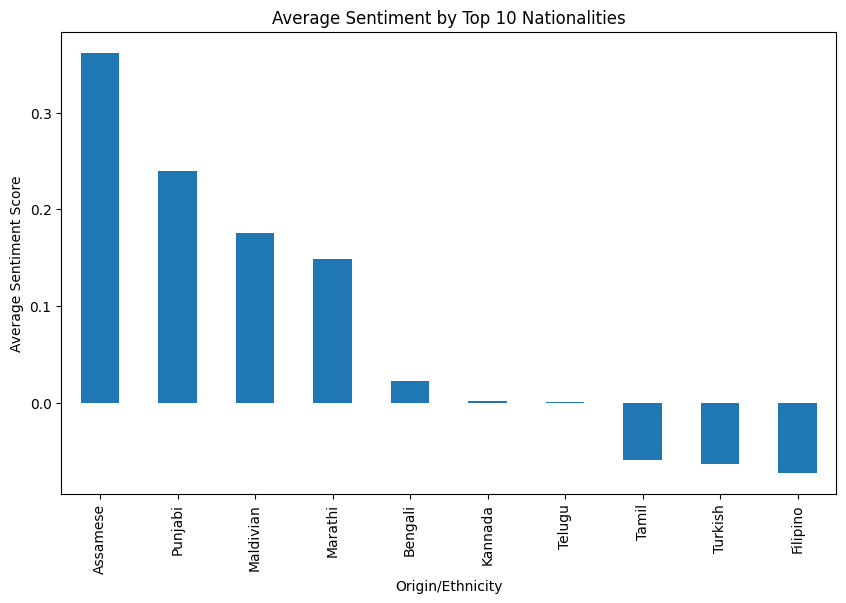

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Загрузка данных
data = pd.read_csv('wiki_movie_plots_deduped.csv')

# --- Шаг 1: Гистограммы ---

# Гистограмма по жанрам
plt.figure(figsize=(10,6))
data['Genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()

# Гистограмма по режиссерам
plt.figure(figsize=(10,6))
data['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Popular Directors')
plt.xlabel('Directors')
plt.ylabel('Number of Movies')
plt.show()

# Гистограмма по национальной принадлежности
plt.figure(figsize=(10,6))
data['Origin/Ethnicity'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Nationalities of Movies')
plt.xlabel('Origin/Ethnicity')
plt.ylabel('Number of Movies')
plt.show()

# Гистограмма по годам
plt.figure(figsize=(10,6))
data['Release Year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# --- Шаг 2: Sentiment Analysis ---

# Загрузка словаря для анализа тональности
nltk.download('vader_lexicon')

# Инициализация анализатора тональности
sia = SentimentIntensityAnalyzer()

# Добавляем колонку с результатами анализа тональности
data['Sentiment'] = data['Plot'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# --- Шаг 3: Распределение тональности ---

# Средняя тональность по жанрам
genre_sentiment = data.groupby('Genre')['Sentiment'].mean().sort_values(ascending=False)
print("Sentiment by Genre:")
print(genre_sentiment)

# Средняя тональность по режиссерам
director_sentiment = data.groupby('Director')['Sentiment'].mean().sort_values(ascending=False).head(10)
print("\nSentiment by Top 10 Directors:")
print(director_sentiment)

# Средняя тональность по национальной принадлежности
origin_sentiment = data.groupby('Origin/Ethnicity')['Sentiment'].mean().sort_values(ascending=False).head(10)
print("\nSentiment by Top 10 Nationalities:")
print(origin_sentiment)

# --- Дополнительно: Визуализация распределения тональности ---

# Тональность по жанрам
plt.figure(figsize=(10,6))
genre_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Sentiment Score')
plt.show()

# Тональность по режиссерам
plt.figure(figsize=(10,6))
director_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Top 10 Directors')
plt.xlabel('Directors')
plt.ylabel('Average Sentiment Score')
plt.show()

# Тональность по национальной принадлежности
plt.figure(figsize=(10,6))
origin_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Top 10 Nationalities')
plt.xlabel('Origin/Ethnicity')
plt.ylabel('Average Sentiment Score')
plt.show()
